In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Update path as necessary
df = pd.read_csv("/content/drive/MyDrive/DS4B/Ames/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [7]:
# Counting numeric columns
numeric_columns_count = df.select_dtypes(include=['int64', 'float64']).shape[1]
print("Number of Numeric Variables:", numeric_columns_count)

# Counting categorical columns
categorical_columns_count = df.select_dtypes(include=['object']).shape[1]
print("Number of Categorical Variables:", categorical_columns_count)

Number of Numeric Variables: 38
Number of Categorical Variables: 43


In [8]:
missing_values = df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Percentage of missing values per column:")
print(missing_values)

Percentage of missing values per column:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [9]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

df.loc[df['GarageType'].isna(), 'GarageYrBlt'] = 0

df['MasVnrArea'] = df.apply(lambda x: 0 if x['MasVnrType'] == 'None' else x['MasVnrArea'], axis=1)

df['Electrical'] = df['Electrical'].fillna('Mixed')

missing_values_update = df[['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'Electrical']].isnull().mean() * 100

print("Percentage of missing values after cleaning null values:")
print(missing_values_update)

Percentage of missing values after cleaning null values:
LotFrontage    0.000000
GarageYrBlt    0.000000
MasVnrArea     0.547945
Electrical     0.000000
dtype: float64


In [10]:
rows_with_null = df['MasVnrArea'].isnull().sum()

print(f"Rows with null MasVnrArea: {rows_with_null}")

df = df.dropna(subset=['MasVnrArea'])
missing_values_update = df[['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'Electrical']].isnull().mean() * 100

print("\nPercentage of missing values after cleaning remaining null values for 'MasVnrArea':")
print(missing_values_update)

Rows with null MasVnrArea: 8

Percentage of missing values after cleaning remaining null values for 'MasVnrArea':
LotFrontage    0.0
GarageYrBlt    0.0
MasVnrArea     0.0
Electrical     0.0
dtype: float64


In [11]:
ordinal_mappings = {
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'PoolQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0},
}

for column, mapping in ordinal_mappings.items():
    df[column] = df[column].fillna('NA')
    df[column] = df[column].map(mapping)

df.head()

<ipython-input-11-85827c395adb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna('NA')
<ipython-input-11-85827c395adb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map(mapping)
<ipython-input-11-85827c395adb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
unique_ordinal_mappings = {
    'LotShape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
    'LandSlope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'Functional': {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0},
    'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}
}

for column, mapping in unique_ordinal_mappings.items():
    if 'NA' in mapping:
        df[column] = df[column].fillna('NA')
    df[column] = df[column].map(mapping)

df.head()

<ipython-input-12-d7eb06a0fa80>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map(mapping)
<ipython-input-12-d7eb06a0fa80>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map(mapping)
<ipython-input-12-d7eb06a0fa80>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,4,Lvl,AllPub,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,4,Lvl,AllPub,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,3,Lvl,AllPub,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,3,Lvl,AllPub,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,3,Lvl,AllPub,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [13]:
df = pd.get_dummies(df, columns=['MiscFeature', 'Alley', 'GarageType', 'GarageFinish', 'MasVnrType'], drop_first=False, dummy_na=False, dtype=int)

In [14]:
df = pd.get_dummies(df, drop_first=True, dummy_na=False, dtype=int)

In [15]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df = pd.get_dummies(df, columns=['MSSubClass'], drop_first=True, dtype=int)

In [16]:
df.head()

,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,1,65.0,8450,4,3,7,5,2003,2003,196.0,...,0,0,0,0,1,0,0,0,0,0
1,2,80.0,9600,4,3,6,8,1976,1976,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,68.0,11250,3,3,7,5,2001,2002,162.0,...,0,0,0,0,1,0,0,0,0,0
3,4,60.0,9550,3,3,7,5,1915,1970,0.0,...,0,0,0,0,0,1,0,0,0,0
4,5,84.0,14260,3,3,8,5,2000,2000,350.0,...,0,0,0,0,1,0,0,0,0,0


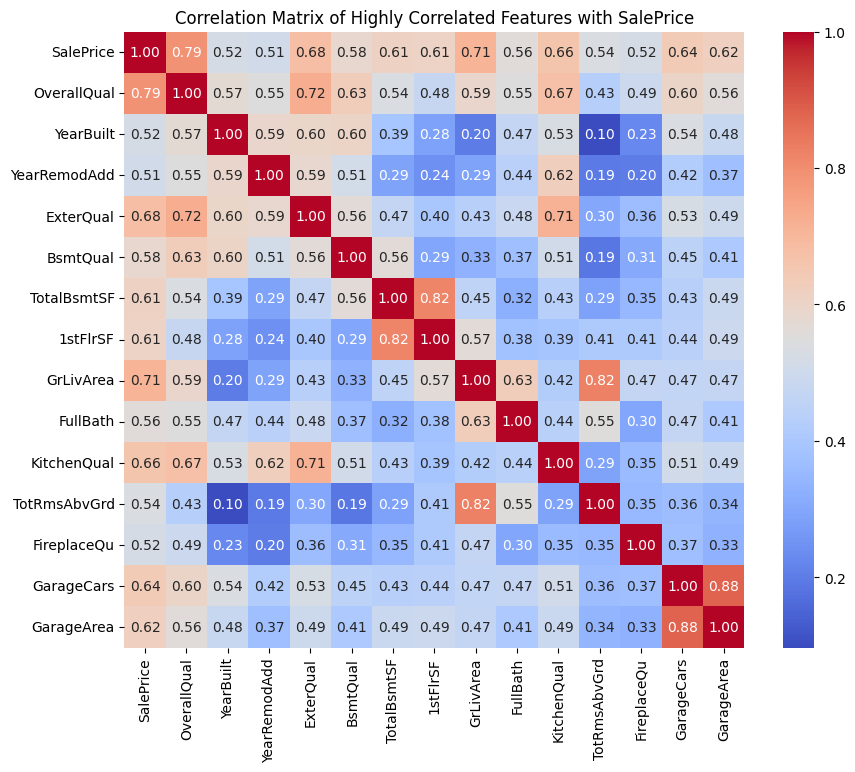

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr(method='pearson').round(3)
high_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"]) > 0.5]

ordered_features = ['SalePrice'] + [feature for feature in high_corr_features if feature != 'SalePrice']
high_corr_matrix = corr_matrix.loc[ordered_features, ordered_features]

plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Highly Correlated Features with SalePrice')
plt.show()

In [ ]:
df['AgeAtSale'] = df['YrSold'] - df['YearBuilt']
df['GarageAgeAtSale'] = df['YrSold'] - df['GarageYrBlt']
df['YearsSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']
df['TotalBathrooms'] = df['FullBath'] + (0.5 * df['HalfBath'])
df['TotalBsmtBathrooms'] = df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
df['TotalPorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']


df.drop('YrSold', axis=1, inplace=True)
df.drop('YearBuilt', axis=1, inplace=True)
df.drop('GarageYrBlt', axis=1, inplace=True)
df.drop('YearRemodAdd', axis=1, inplace=True)
df.drop('FullBath', axis=1, inplace=True)
df.drop('HalfBath', axis=1, inplace=True)
df.drop('BsmtFullBath', axis=1, inplace=True)
df.drop('BsmtHalfBath', axis=1, inplace=True)
df.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)

In [ ]:
df.head()

,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,AgeAtSale,GarageAgeAtSale,YearsSinceRemodel,TotalBathrooms,TotalBsmtBathrooms,TotalPorchArea
0,1,65.0,8450,4,3,7,5,196.0,4,3,...,0,0,0,0,5,5.0,5,2.5,1.0,61
1,2,80.0,9600,4,3,6,8,0.0,3,3,...,0,0,0,0,31,31.0,31,2.0,0.5,0
2,3,68.0,11250,3,3,7,5,162.0,4,3,...,0,0,0,0,7,7.0,6,2.5,1.0,42
3,4,60.0,9550,3,3,7,5,0.0,3,3,...,0,0,0,0,91,8.0,36,1.0,1.0,307
4,5,84.0,14260,3,3,8,5,350.0,4,3,...,0,0,0,0,8,8.0,8,2.5,1.0,84


In [ ]:
df[df['PoolArea'] > 0][['PoolArea', 'PoolQC', 'SalePrice']]

,PoolArea,PoolQC,SalePrice
197,512,4,235000
810,648,1,181000
1170,576,3,171000
1182,555,4,745000
1298,480,3,160000
1386,519,1,250000
1423,738,3,274970


In [ ]:
df.drop('Id', axis=1, inplace=True)

In [ ]:
df.to_csv("cleaned.csv", index=False)

In [ ]:
df = pd.read_csv("cleaned.csv") # cleaned data before normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Initialize the scaler and scale X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled X back to DataFrame and directly add y (unscaled) to it
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df['SalePrice'] = y

# write cleaned and normalized data to csv
X_scaled_df.to_csv('cleaned_norm.csv', index=False)